# Basic Image Classification w/ Keras

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Classify images of Clothing

## Dataset Fetch & Load

In [13]:
fashion_minst = tf.keras.datasets.fashion_mnist

In [32]:
(raw_train_images, train_labels), (raw_test_images, test_labels) = fashion_minst.load_data()

In [33]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Training Dataset - EDA

In [34]:
raw_train_images.shape

(60000, 28, 28)

In [35]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

### Test Dataset - EDA

In [36]:
raw_test_images.shape

(10000, 28, 28)

In [37]:
set(test_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## Dataset Preprocessing

In [38]:
def plot(image):
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [39]:
def multi_plot(images, labels, classes):
    plt.figure(figsize=(10,10))
    
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(classes[labels[i]])

    plt.show()

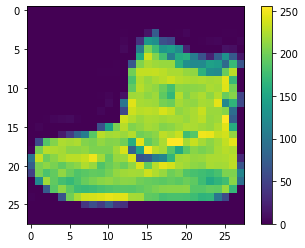

In [41]:
plot(image=raw_train_images[0])

In [42]:
train_images = raw_train_images / 255.0
test_images = raw_test_images / 255.0

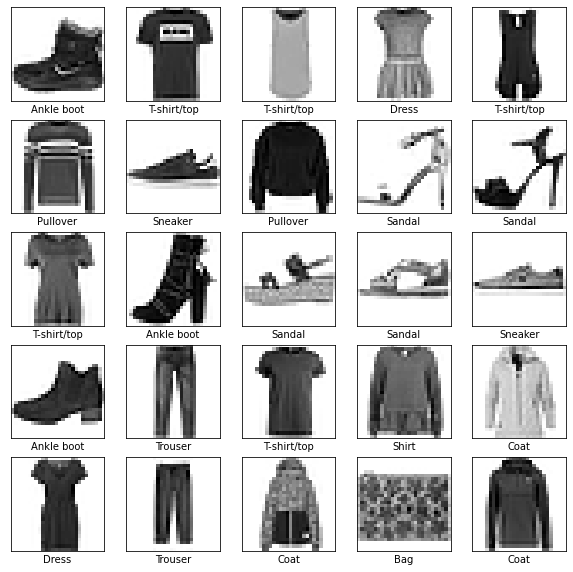

In [43]:
multi_plot(images=train_imgs, labels=train_labels, classes=class_names)

## Model Training

### Layers Setup

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

### Model Compilation

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model Training

In [46]:
model.fit(train_imgs, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 729us/step - loss: 0.6306 - accuracy: 0.7792
Epoch 2/10
1875/1875 [==============================] - 1s 710us/step - loss: 0.3814 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 1s 705us/step - loss: 0.3486 - accuracy: 0.8738
Epoch 4/10
1875/1875 [==============================] - 1s 725us/step - loss: 0.3189 - accuracy: 0.8832
Epoch 5/10
1875/1875 [==============================] - 1s 704us/step - loss: 0.3003 - accuracy: 0.8898
Epoch 6/10
1875/1875 [==============================] - 1s 715us/step - loss: 0.2790 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 2s 827us/step - loss: 0.2640 - accuracy: 0.9026
Epoch 8/10
1875/1875 [==============================] - 1s 778us/step - loss: 0.2605 - accuracy: 0.9030
Epoch 9/10
1875/1875 [==============================] - 1s 712us/step - loss: 0.2477 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 2s 851u

### Model Evaluation

In [51]:
test_loss, test_accuracy = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.3442 - accuracy: 0.8805


In [53]:
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.34422725439071655
Test Accuracy: 0.8805000185966492


## Model Inference

In [55]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [56]:
predictions = probability_model.predict(test_images)

In [58]:
predictions[0]

array([1.3814180e-07, 1.2729629e-07, 2.3027326e-06, 1.8434484e-09,
       6.1523309e-08, 3.0916166e-03, 4.0236174e-07, 4.5912373e-03,
       1.8071733e-08, 9.9231416e-01], dtype=float32)

In [62]:
np.argmax(predictions[0])

9

In [63]:
test_labels[0]

9

### Setting up ground work

In [66]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

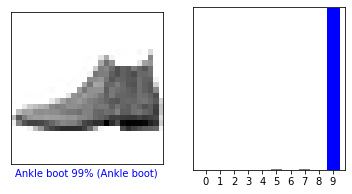

In [67]:
i = 0

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

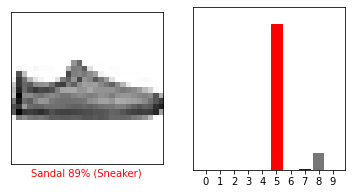

In [69]:
i = 12

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

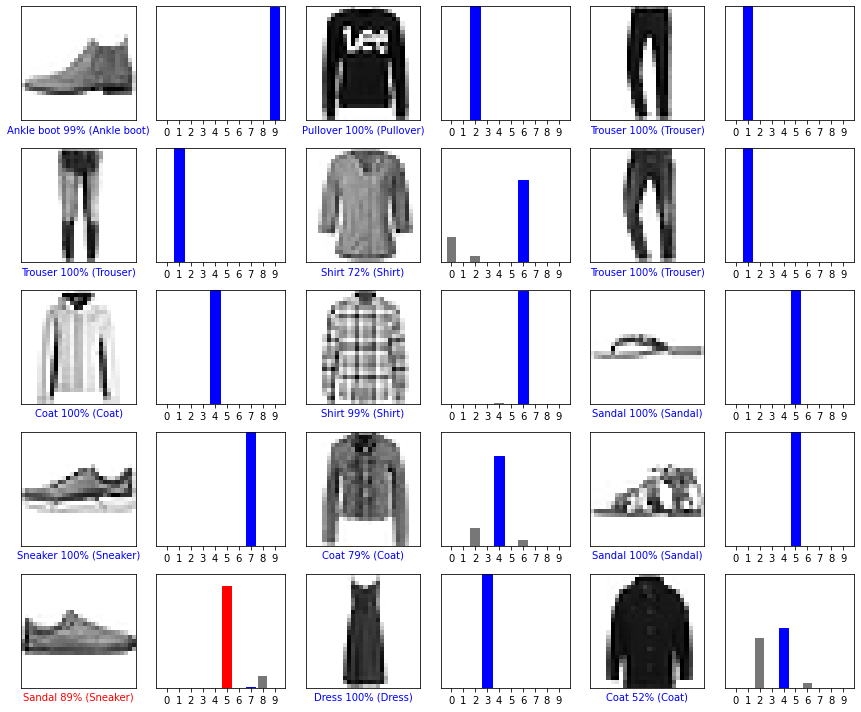

In [71]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
    
plt.tight_layout()
plt.show()